# Numerical solver for Schroedinger's equation.

In [80]:
import math
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

%matplotlib inline

rc('text', usetex=True)

In [3]:
def potential(position):
    '''
    A function used to return a potential. When u < 1.0, then potential is 0.
    When u = 1.0, then potential is 1/2. And when u > 1.0, then potential is 1
    '''
    if position < 1 / 2:
        return 0
    elif position == 1 / 2:
        return 1 / 2
    return 1

In [4]:
def shooting(initwave, initderiv, energy, noofpoints):
    '''
    First function to be called when generating a new eigenfunction. Arguments are
    used to specify initial conditions, energy epsilon, and number of points
    (spacing)

    :param initwave: Initial value for the wavefunction
    :param initderiv: Initial value for the derivative
    :param energy: Value for the energy eigenvalue
    :param noofpoints: Number of points calculated
    '''
    # Initializing 3d array to store wave, derivatives, and position
    wave = [[initwave], [initderiv], [0]]
    # Calculate delta x based on number of points requested
    delta = 3 / noofpoints
    return generate(wave, energy, delta)

In [5]:
def generate(wave, energy, delta):
    '''
    Function that is actually performing all the calculations for the new
    eigenfunction
    '''
    beta = 64

    while wave[2][-1] <= 3:
        # Equation 2 in code form
        newwave = wave[0][-1] + delta * wave[1][-1]
        # Equation 1 in code form
        newder = wave[1][-1] - delta * beta * \
            (energy - potential(wave[2][-1])) * wave[0][-1]
        wave[0].append(newwave)
        wave[1].append(newder)
        # Calculating new u and adding it to the position array
        wave[2].append(wave[2][-1] + delta)
    return wave

In [6]:
def areaunder(y_val, x_val, xmax):
    '''
    Function that returns the area under the graph of a mathematical
    function passed as an argument. The area is calculated from x=0
    to x=xmax
    '''
    area = 0
    for i in range(0, len(y_val) - 1):
        if x_val[i] < xmax:
            # The middle value between to y data points is used
            area += (y_val[i] + (y_val[i + 1] - y_val[i]) / 2) * \
                (x_val[i + 1] - x_val[i])
    area = area * 2
    print("Area " + str(area))
    return area

In [7]:
def probability(wave):
    '''
    Function returning probability distribution for a given real wave function
    '''
    return [x**2 for x in wave]

In [8]:
def normalization(wave):
    '''
    Function that returns normalized wave function by calculating overall probability
    and dividing the wave function by this normalization constant
    '''
    # Calculating the probability distribution of the wave
    probabilitydstr = probability(wave[0])
    constant = 1 / math.sqrt(areaunder(probabilitydstr, wave[2], 4))
    # List comprehension is used to divide all data points by the
    # constant = 1/K from Equation 5
    return [x * constant for x in wave[0]]

In [77]:
def ploteigenfcs(x_val, lines, title, file_name):
    '''
    Plots three different functions onto one figure. Currently the color used are
    black, blue, red, magneto, cyan, and yellow
    '''
    plt.figure()
    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=cycler(
        'color', ['k', 'b', 'r', 'g', 'm', 'c', 'y']))
    for desc, y_vals in lines.items():
        plt.plot(x_val, y_vals, label=desc)

    ymax = 0
    ymin = 0
    for y_val in lines.values():
        ymax = max(max(y_val), ymax)
        ymin = min(min(y_val), ymin)
    plt.ylim(ymin-0.1, ymax+0.1)
    plt.xlim(0, 4)
    plt.xlabel(r'Radius $u=r/a_{0}$')
    plt.ylabel(r'Eigenfunction $\psi(u)$')
    plt.title(title, ha='center', fontsize=14)
    plt.legend()
    plt.grid()

In [78]:
def numerical_slv():
    '''
    Executes the numerical solver script and generates plots
    '''
    energy0 = 0.09802437  # Ground state energy
    energy1 = 0.382721825  # First excited state energy
    energy2 = 0.807895  # Second excited state energy
    energy_unb = 2

    eigenfc0 = shooting(1.0, 0, energy0, 6000)
    eigenfc1 = shooting(0, 1.0, energy1, 6000)
    eigenfc2 = shooting(1.0, 0, energy2, 6000)
    # eigenfc_un = shooting(1.0, 1.0, energy_unb, 6000)

    lines = {
        'Ground State': normalization(eigenfc0),
        'First Excited State': normalization(eigenfc1),
        'Second Excited State': normalization(eigenfc2),
        #'Unbound Energy': eigenfc_un[0]
    }
    
    ploteigenfcs(eigenfc0[2], lines,
                 r'\textbf{Eigenfunctions vs Radial Distance}', 'test')

Area 0.6321817393489232
Area 0.027024090565422633
Area 0.7925728491265391


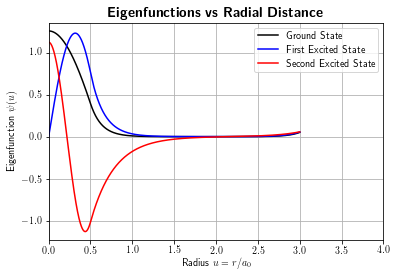

In [79]:
numerical_slv()